#### problem Statement
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods

In [1]:
# import necesaary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import csv file
df=pd.read_csv("E:\\Data Science\\Data science Practise project\\winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# first check shape of data frame
df.shape

(1599, 12)

#### dataframe consist of 1599 rows and 12 columns

In [4]:
# now check datatype of each column
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

#### 11 column has float type object and 1 column has int datatype

In [5]:
# lets check any missing value in dataframe
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

there is no null value presentin the dataset

In [6]:
# sometime space is present in dataset and it is considered as data ,so lets whether space is pesent in our dataset or not
df.loc[df['fixed acidity']==" "]
df.loc[df['volatile acidity']==" "]
df.loc[df['citric acid']==" "]
df.loc[df['residual sugar']==" "]
df.loc[df['chlorides']==" "]
df.loc[df['free sulfur dioxide']==" "]
df.loc[df['total sulfur dioxide']==" "]
df.loc[df['pH']==" "]
df.loc[df['sulphates']==" "]
df.loc[df['alcohol']==" "]
df.loc[df['quality']==" "]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


### Its good to see that no space or null value is present in our dataset,lets go for describe method

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### We get stastical analysis of dataset, we get mean and standard deviation of each column, min and max shows minimum and maximum value of each column.25% denotes first quartle of data,50% denotes second quartile,and 75% denotes third quartile of dataframe

In [8]:
df.info()   # all column has 1599 non null count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Info method give datatype of each column and non null count of columns

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### In our dataframe there are 11 feature and 1 label, all feature column has continuos data and label has categorical data,so we build classification model.lets check how many categories are present in label"quality", 

In [10]:
df['quality'].unique()  # lets check how many class are present in our dataset

array([5, 6, 7, 4, 8, 3], dtype=int64)

#### Total 6 class are present in our label column

In [11]:
df['quality'].value_counts()  # get frequency of each class

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### here we get count of each class ,class 5 has total 681 count,class 6 has total 638 count,class 7 has total 199 count,class 4 has total 53 count, class 8 has total 18 count& class 3 has total 10 count,

### now as per problem statement , we will make two class of label 'quality' good and not good,class 3,4,5 and 6 are considered as not good and class 7 & 8 are treated as good.but we can't give text data to dataframe, so we will replace good by 1 and not good by 0. so our label is binary classification type 

In [12]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='quality', ylabel='count'>

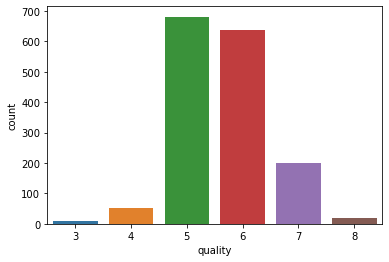

In [13]:
sns.countplot(df['quality'])

count plot is usedto visualize the class labels, by observing above class value, we can make conclusion that data imbalance is present

 it is multiclass classification,we will convert into binary class

In [14]:
def class_conversion(x):  
    if 3<=x<=6:
        return 'Not_good'
    else:
        return 'Good'

here we want to assign "Not good" for class 3,4,5 and 6 and assign 'Good'for class 7 and 8, for this use def function class conversion, in which we get good for class 7and 8 and not good for remaining class

Now we will apply this conversion to label "quality",see below dataframe label

In [15]:
# use map function
df['quality']=df['quality'].map(class_conversion)
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Not_good
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Not_good
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Not_good
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Not_good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Not_good
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,Not_good
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,Not_good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,Not_good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,Not_good


Here we replaced the all label class value by "good" and "not good"

## UniVariate Analysis

Not_good    1382
Good         217
Name: quality, dtype: int64

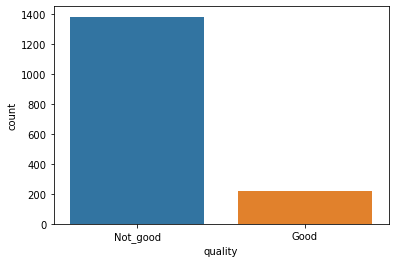

In [16]:
sns.countplot(df['quality'])
df['quality'].value_counts()

here we clearly seen that ,data in class is inbalanced,class 0 has frequency 1382,class 1 has frequency 217, it means data is unbalanced,
we use upsampling or downsampling technique for balancing of dataset

In [17]:
df["quality"].replace('Good',1,inplace=True)
df["quality"].replace('Not_good',0,inplace=True)

 now we convert text data into numerical numbers,its like nominal encoding, where we replace "Good" by 1 and 'Not_good' by 0

0    1382
1     217
Name: quality, dtype: int64

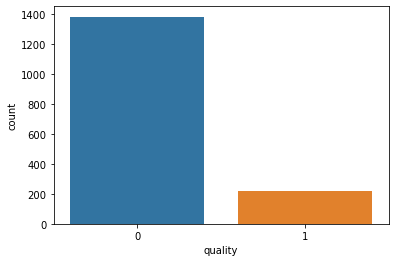

In [18]:
sns.countplot(df['quality'])
df['quality'].value_counts()

we get same graph as before, only encoding is used here

### ,Here we replaced Good by 1 and Notgood by 0,here we clearly seen that ,data in class is inbalanced,class 0 has frequency 1382,class 1 has frequency 217, it means data is unbalanced, we use upsampling or downsampling technique for balancing of dataset

## Bivariate Analysis

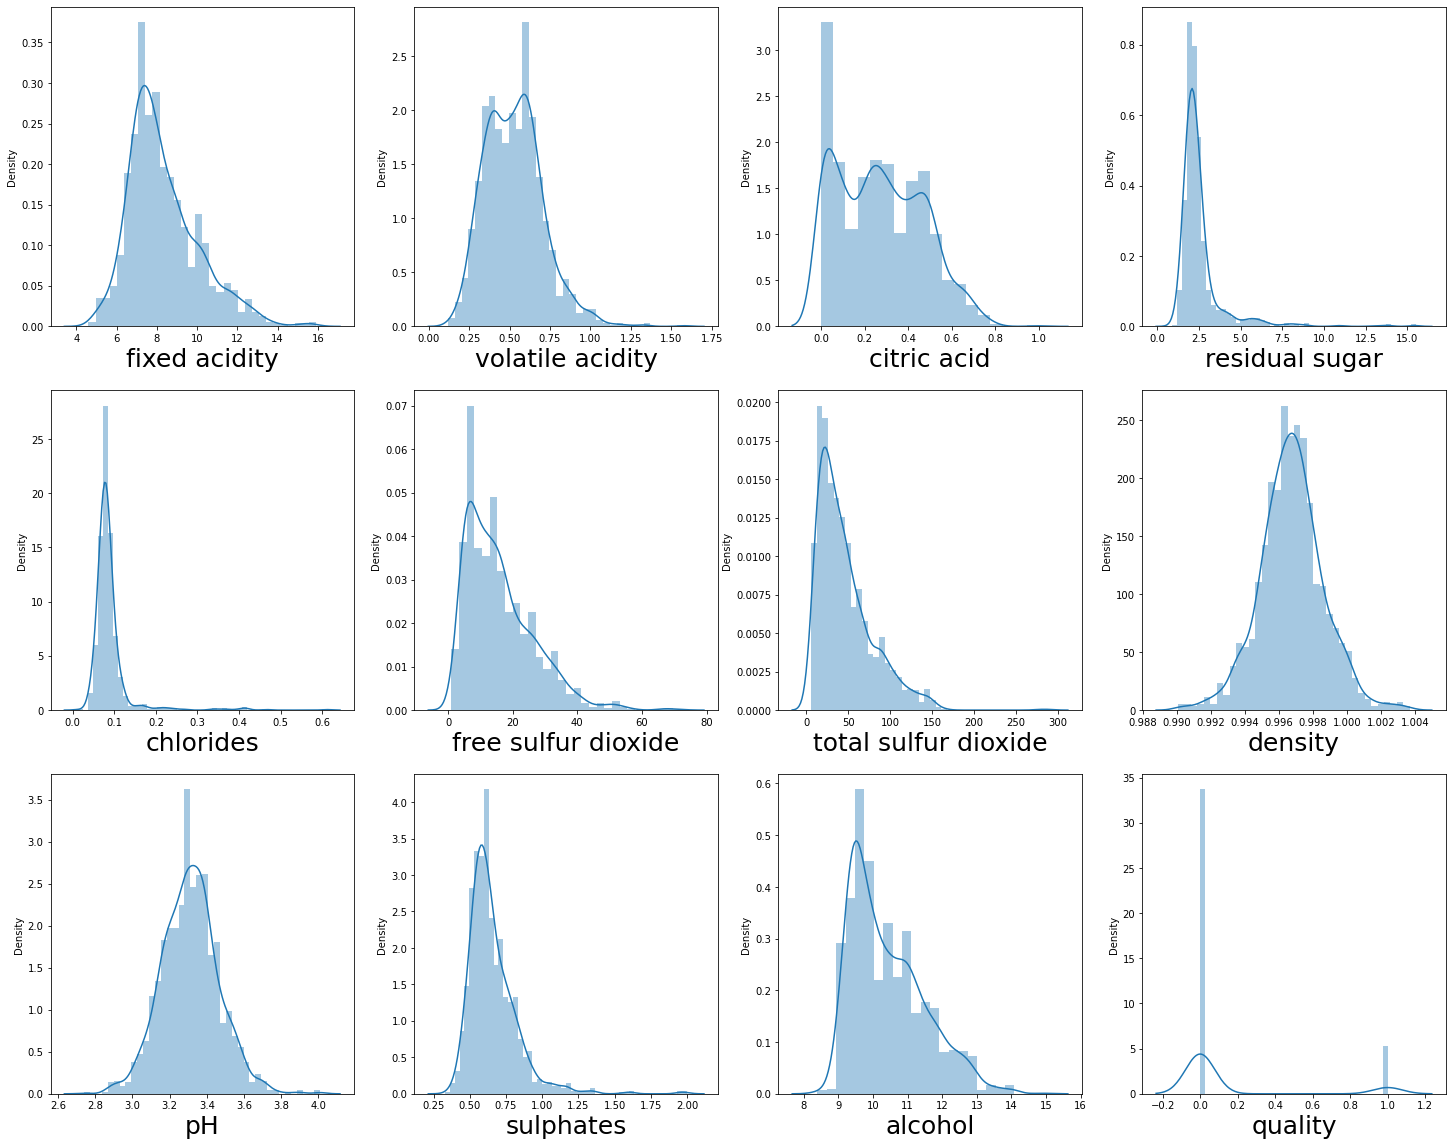

In [19]:
# lets plot distplot for every column
plt.figure(figsize=(25,20)) # 25 represnt row dimension and 20 represents column dimension
plotnumber=1  # initially plotnumber is set to1
for column in df:  # pass every column in for loop
    if plotnumber <=13:  # maximum value for plotnumber is set to 15, generallay it is equal to number of columns in dataframe
        plt.subplot(3,4,plotnumber)  # we draw,subplot in 3 rows and 3 columns
        ax=sns.distplot(df[column])  # draw distplot for each column
        plt.xlabel(column,fontsize=25)# assign label to x axis which is column name
    plotnumber+=1   # increment the plotnumber after every iteration
plt.show()  # display the plot

here we ploted normal distribution for all features and label,lot of right skewness is present in column'chlorides','residual sugar','free sulfur dioxide','total sulfur dioxide','sulphate' and 'alcohol'our label is'quality' which contain binary data or categorical data, there fore its ND curve like this.most of feature has right skewwed

## Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

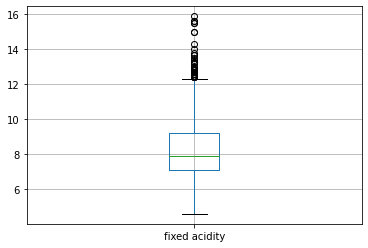

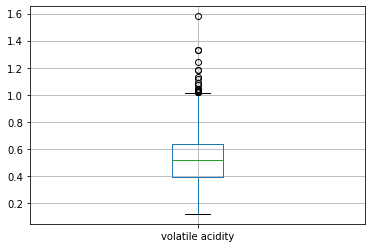

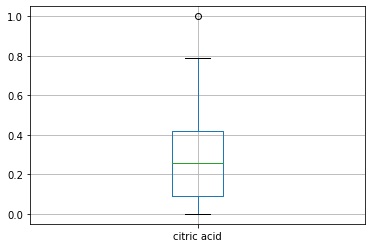

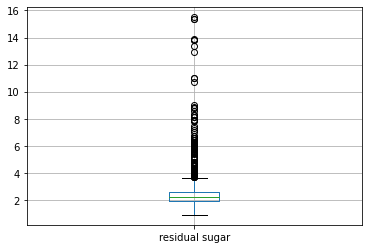

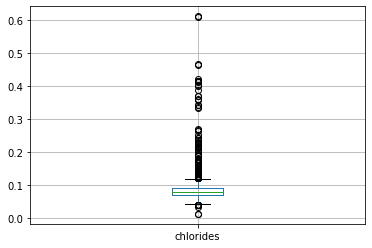

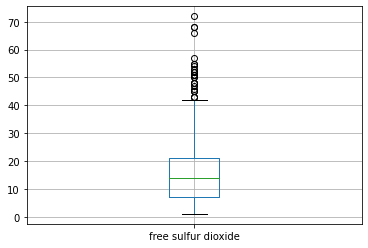

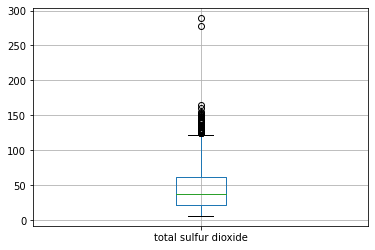

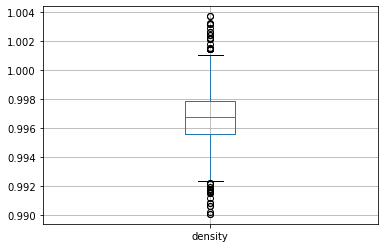

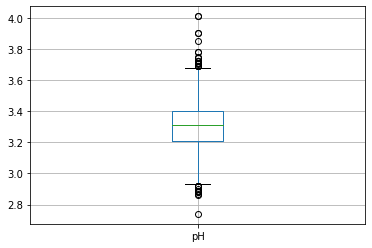

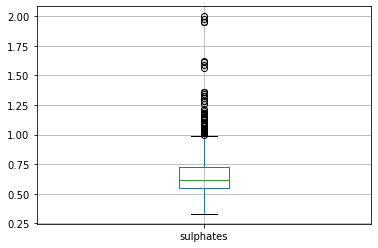

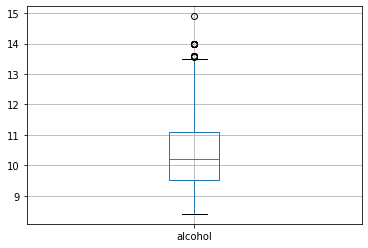

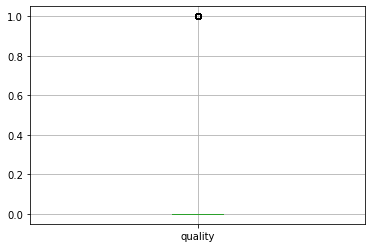

In [20]:
# lets draw the Box plot to indentify the outlier in the the dataframe
# now we will see any outlier present in our dataset using box plot
for column in df:  # we pass every column to for loop
    plt.figure()   
    df.boxplot([column]) # box plot of every column is plotted
plt.show

In Box plot,feature'fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density',"ph",'sulphates','alcohol' has outliers above the third qaurtiles.feature 'chloride'.'density','ph' has outliers below first quartile,we use z score method to remove this outliers

In [21]:
# lets use z score to remove outliers
from scipy.stats import zscore # z score represent the number of  standard deviation with which value of observation differ than mean value
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]  # z score with std deviation =3

We can placed z score on normal distribution curve ranges from -3 standard deviation to the left of normal distribution curve to +3 S.D to right of normal distribution ,there we select z<3,and with value it cover almost 97.72 area of Distribution

<function matplotlib.pyplot.show(close=None, block=None)>

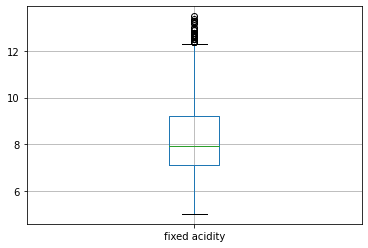

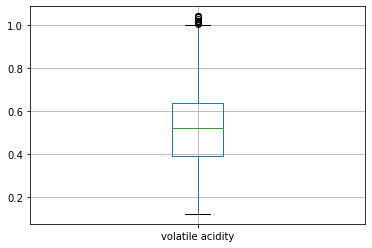

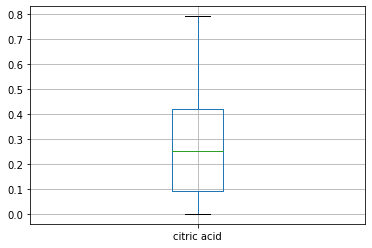

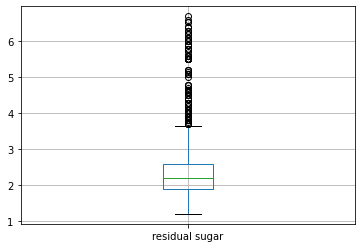

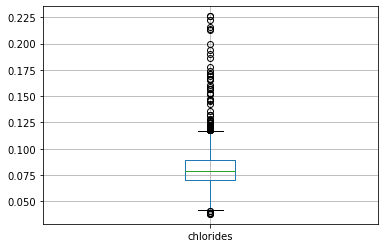

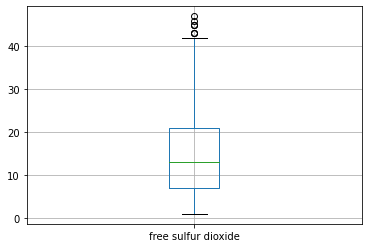

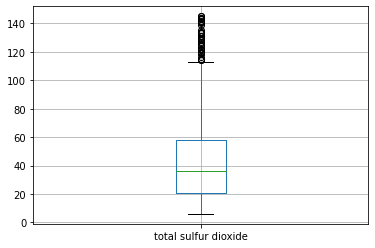

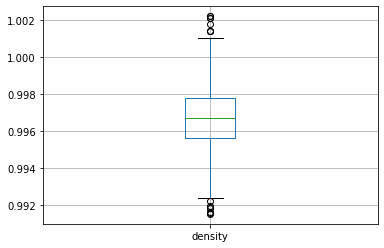

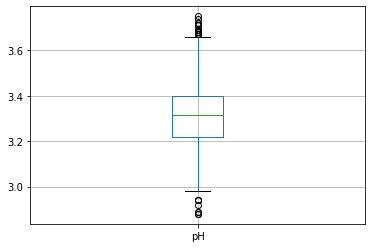

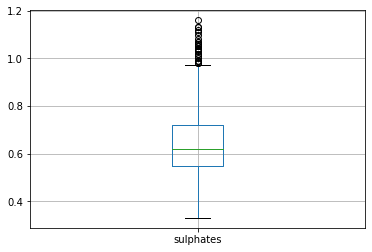

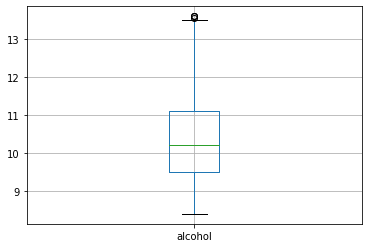

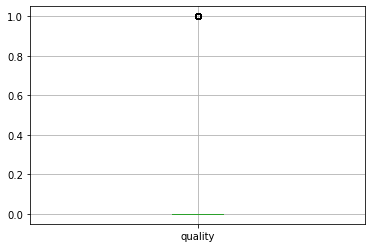

In [22]:
# lets draw the Box plot to indentify the outlier in the the dataframe
# now we will see any outlier present in our dataset using box plot
for column in new_df:  # we pass every column to for loop
    plt.figure()   
    new_df.boxplot([column]) # box plot of every column is plotted
plt.show

still lot of outlier are present in column 'chlorides','residual sugar','free sulfur dioxide','total sulfur dioxide','density'and 'ph'

In [23]:
print(new_df.shape)

(1458, 12)


now we have 1458 rows and 12 columns

In [24]:
new_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [25]:
#new_df['fixed acidity']=np.log(new_df['fixed acidity'])
#new_df['volatile acidity']=np.log(new_df['volatile acidity'])
#new_df['citric acid']=np.log(new_df['citric acid'])
#new_df['residual sugar']=np.log(new_df['residual sugar'])
#new_df['chlorides']=np.log(new_df['chlorides'])
#new_df['free sulfur dioxide']=np.log(new_df['free sulfur dioxide'])
#new_df['total sulfur dioxide']=np.log(new_df['total sulfur dioxide'])
#new_df['density']=np.log(new_df['density'])
#new_df['pH']=np.log(new_df['pH'])
#new_df['sulphates']=np.log(new_df['sulphates'])
#new_df['alcohol']=np.log(new_df['alcohol'])

In [26]:
x=new_df.drop(columns=['quality'])
y=df['quality']

here we separated all features from lables, x has all features and y has  label only

In [27]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x


array([[-0.46910218,  1.04577542, -1.52186998, ...,  1.35995444,
        -0.58823037, -1.11232895],
       [-0.17212704,  1.90240432, -1.52186998, ..., -0.81842137,
         0.45352708, -0.52685366],
       [-0.17212704,  1.34481498, -1.24278981, ..., -0.38286787,
         0.22198916, -0.52685366],
       ...,
       [-1.45195519, -0.00716591, -0.66389542, ...,  0.74543779,
         0.9322481 ,  0.7428399 ],
       [-1.88631136,  0.75846579, -0.72514559, ...,  1.76196223,
         0.66861292, -0.03320546],
       [-1.77310975, -1.3354534 ,  1.0702808 , ...,  0.53744195,
         0.30109116,  0.7428399 ]])

power transform method is used when our data has lot of skewness, it convert skewed data into normal distribution data, it has two methods 1.Box-cox method 2)yeo -johnson method. here we used yeo johnson method beacause it handle positive as well as negative values, box cox deals with only positive(not o also)

In [28]:
x_new=pd.DataFrame(x)
x_new

,0,1,2,3,4,5,6,7,8,9,10
0,-0.469102,1.045775,-1.521870,-0.610050,-0.145674,-0.238196,-0.063312,0.635233,1.359954,-0.588230,-1.112329
1,-0.172127,1.902404,-1.521870,0.648011,0.981105,1.092232,0.954919,0.056291,-0.818421,0.453527,-0.526854
2,-0.172127,1.344815,-1.242790,0.207208,0.714585,0.241177,0.626959,0.172545,-0.382868,0.221989,-0.526854
3,1.571351,-1.559116,1.441794,-0.610050,-0.207728,0.442705,0.786687,0.750325,-1.112726,-0.391548,-0.526854
4,-0.469102,1.045775,-1.521870,-0.610050,-0.145674,-0.238196,-0.063312,0.635233,1.359954,-0.588230,-1.112329
...,...,...,...,...,...,...,...,...,...,...,...
1453,-1.556059,0.513269,-0.977605,-0.374385,0.619516,1.530345,0.319096,-1.059841,0.951840,-0.391548,0.287108
1454,-1.886311,0.229325,-0.849852,0.031636,-1.120823,1.893947,0.540682,-0.929512,1.427375,0.994340,0.901833
1455,-1.451955,-0.007166,-0.663895,0.207208,-0.145674,1.353559,0.177040,-0.563765,0.745438,0.932248,0.742840
1456,-1.886311,0.758466,-0.725146,-0.374385,-0.207728,1.530345,0.319096,-0.722762,1.761962,0.668613,-0.033205


<function matplotlib.pyplot.show(close=None, block=None)>

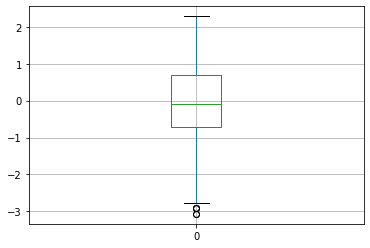

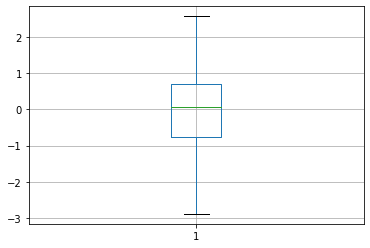

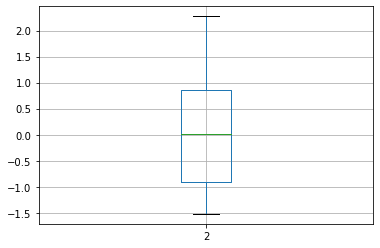

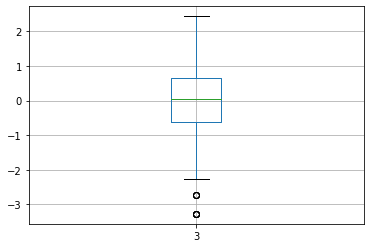

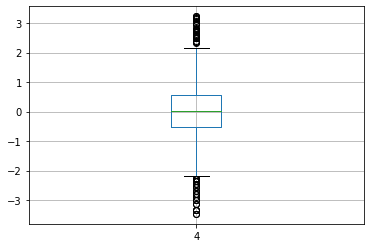

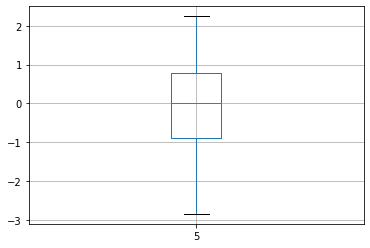

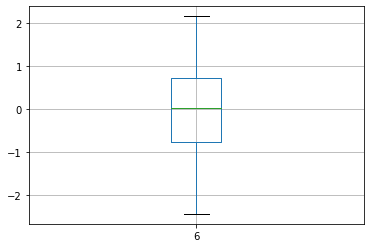

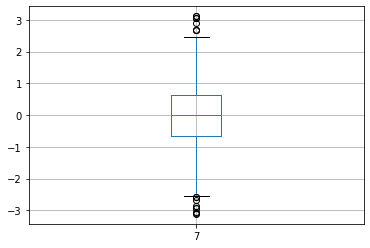

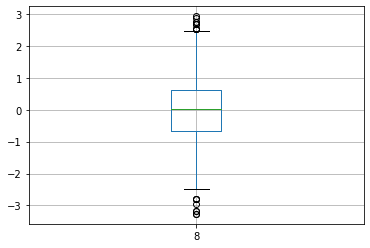

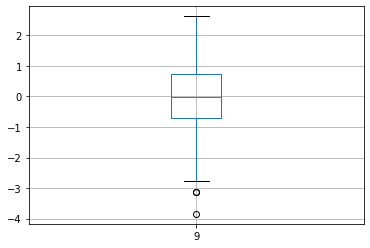

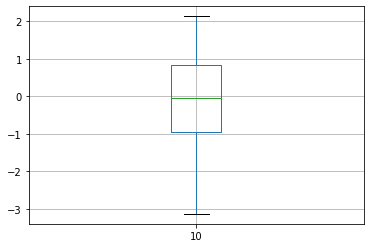

In [29]:
for column in x_new:  # we pass every column to for loop
    plt.figure()   
    x_new.boxplot([column]) # box plot of every column is plotted
plt.show

some outliers are still present there,wecanot reduce it further beacause it may lead to data loss

In [30]:
#q=new_df['volatile acidity'].quantile(0.95)# we are removing the bottom 1% data from column "Length"
#new_df2=new_df[new_df['volatile acidity']>q]
#q=new_df['residual sugar'].quantile(0.97) # we are removing the bottom 1% data from column "Diameter"
#new_df2=new_df[new_df['residual sugar']<q]
#q=new_df['chlorides'].quantile(0.97)# we are removing the bottom 2% data from column "Height"
#new_df2=new_df[new_df['chlorides']>q]
#q=new_df['chlorides'].quantile(0.97)# we are removing the top 2% data from column "Height"
#new_df2=new_df[new_df['chlorides']<q]
#q=new_df['density'].quantile(0.98)# we are removing the top 2% data from column "Whole weight"
#new_df2=new_df[new_df['density']<q]
#q=new_df['density'].quantile(0.98)# we are removing the top 2% data from column "Shucked weight"
#new_df2=new_df[new_df['density']>q]
#q=new_df['pH'].quantile(0.94)# we are removing the top 2% data from column "Viscera weight"
#new_df2=new_df[new_df['pH']<q]
#q=new_df['pH'].quantile(0.97)# we are removing the bottom 2% data from column "Shell weight"
#new_df2=new_df[new_df['pH']>q]
#q=new_df['sulphates'].quantile(0.97)# we are removing the top 2% data from column "Shell weight"
#new_df2=new_df[new_df['sulphates']<q]

In [31]:
x_new['Quality']=y  # append label'Quality' to our dataframe

In [32]:
x_new.shape

(1458, 12)

In [33]:
x_new.isnull().sum()

0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
Quality    0
dtype: int64

we make confirmation,that no null is present in our dataset

## Multivariate Analysis

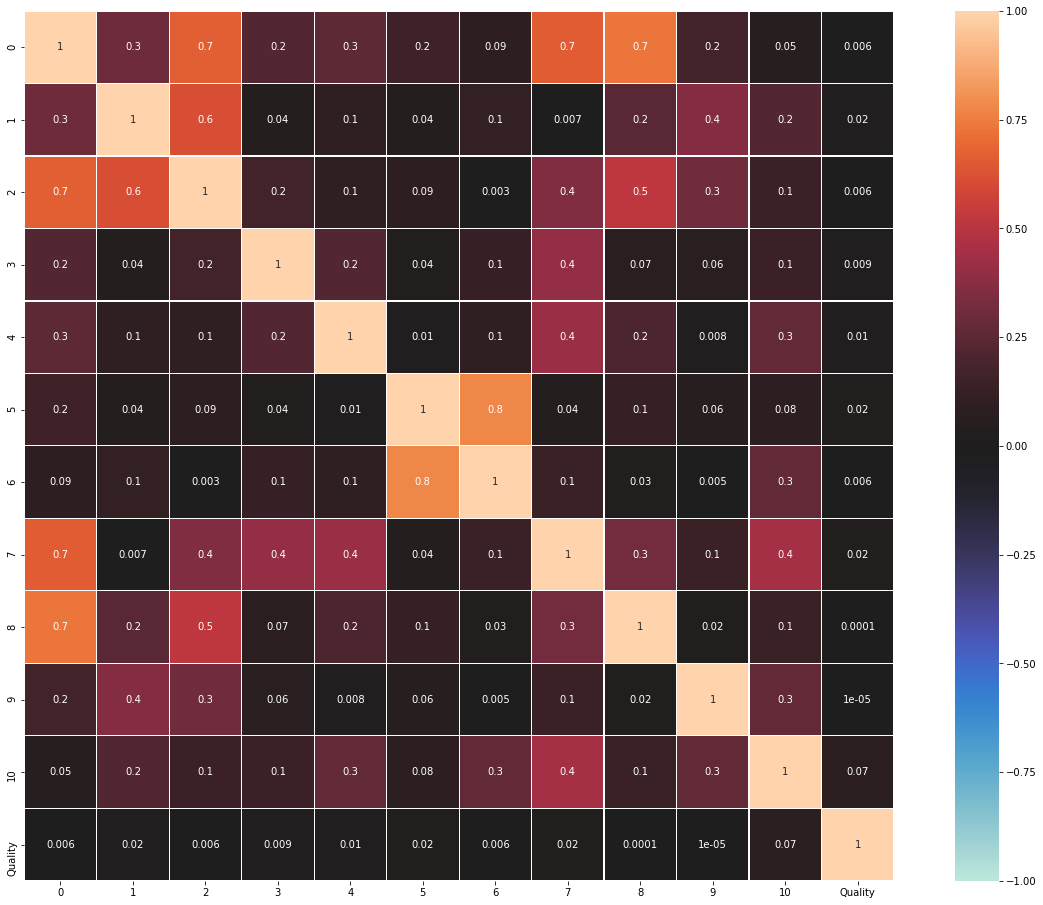

In [34]:
# lets plot heatmap which is multivaraiate analysis,find the coeffient of multicollinearity
df_corr=x_new.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=.1)
plt.show()

Heatmap is used to find correlation between independant variable and Target variable, value 1 indicate correlation of label verses label, correaltion between feature 'Sex' with other feature is very less, but we know that label 'Quality' is categorical value, thats why we get less correation, we can not compare correlation between categorical and continous data.the values 0.006,0.009,0.001 shows very less or negligible correaltion

In [35]:
corr_matrix=x_new.corr()   # here we get values of correlation in descending order
corr_matrix['Quality'].sort_values(ascending=False)

Quality    1.000000
10         0.070815
5          0.016789
1          0.015222
4          0.009614
0          0.005989
2          0.005917
8          0.000131
9         -0.000014
6         -0.006051
3         -0.009370
7         -0.024635
Name: Quality, dtype: float64

first value 1 shows relation between label verses label, so ignore it. the value of correation ranges between -1 to +1, 1 shows strong positive correlation between variable,it means if one variable increses other also increase,-1 represent strong negative correlation between variable,it means if one variable value increase other goes on decreasing, value 0 or near to 0 represents no correlation between variable

In [36]:
x_new.skew()

0          0.019079
1          0.005289
2          0.018652
3         -0.003351
4         -0.115179
5         -0.021273
6         -0.005751
7         -0.000989
8         -0.000062
9          0.021132
10         0.108436
Quality    2.069932
dtype: float64

skewness range is + 0.5 to -0.5 anything between this range is permissible and outside this range is high skewness,all values is in presribed range

In [37]:
x_new.shape

(1458, 12)

In [38]:
x=x_new.drop(columns=['Quality'],axis=1)
y=x_new['Quality']

Now we separate features from target variable, x has all features and y has target variable

In [39]:
from imblearn.over_sampling import SMOTE

SMOTE is synthetic minority oversampling Technique used to solve the problem of imbalancing.It randomly increases nminority class by replicating them and balances class distribution

In [40]:
SM=SMOTE()
x,y=SM.fit_resample(x,y)
y.value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
2501    1
2502    1
2503    1
2504    1
2505    1
Name: Quality, Length: 2506, dtype: int64>

SMOTE perform oversampling all class to have same number of count as the class with most number of counts 

In [41]:
from imblearn.under_sampling import NearMiss
NR=NearMiss()  # assign NR to NearMiss
x,y=NR.fit_resample(x,y)  # now undersample the majority class and equals to minority class
y.value_counts()  # we get count of output y 

1    1253
0    1253
Name: Quality, dtype: int64

Near Miss is a undersampling Technique,instead of resampling,it will make majority class equals to minority class.to prevent information loss, we use Near Miss algorithm,lets check output y, all class in the output has same count or frequency,so we achive data balancing

In [42]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

Standard scaler removes the mean and scales each features to unit variance ,we got all transformed values,generally it is useful for those feature which has normal distribution

classification score is used to check performance of classification model,classification score give accuracy which is ratio of true predictions divided by total predictions.classification report contains precision,f1 score and accuracy

In [91]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(x_scaled)

array([[ 1.77591239, -1.15711332,  1.35050402, ..., -0.44358943,
         0.28000654, -0.16960336],
       [ 0.58767495, -2.35634333,  0.15143592, ..., -0.21382582,
        -0.01282903,  0.01835113],
       [ 0.55397314, -1.55919802,  0.5711195 , ..., -0.05758538,
         0.3204069 , -0.01554708],
       ...,
       [ 3.36196211,  0.06322957,  0.28427379, ...,  1.64213748,
         0.49333165,  0.34574118],
       [-2.16966963, -3.88189471, -1.32931957, ...,  0.32415815,
        -0.15896523,  0.2039054 ],
       [ 3.10742398, -0.12333433,  0.37768505, ...,  2.07870862,
         0.84955463,  0.30493468]])

Principal component analysis is dimension(feature) reduction techniques.the feature which dont have any weightage ,we will reduce it. we have total 11 features ,out of 11 we will keep only those features which has good weightage

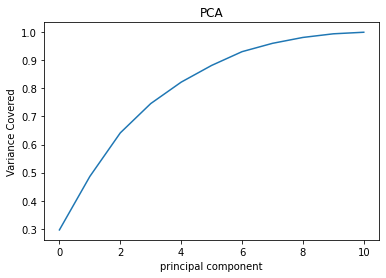

In [92]:
# now implement scree plot
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("principal component")
plt.ylabel('Variance Covered')
plt.title("PCA")
plt.show()

Scree plot is a graphical tool used in selection of number of relevant features.it shows the variance of feature, if variance remain same,from that point remaining features are reduced

cumsum means cumulative summation,on x axis we have total 11 feature, but from feature 10 and onwards our plot will remains constantand same variance.so select 10 features and build model

In [93]:
pca=PCA(n_components=10)
new_pca=pca.fit_transform(x_scaled)
princi_comp=pd.DataFrame(new_pca,columns=range(1,11))
princi_comp

,1,2,3,4,5,6,7,8,9,10
0,1.775912,-1.157113,1.350504,0.031670,-0.680822,-1.001091,-0.344210,-0.416967,-0.443589,0.280007
1,0.587675,-2.356343,0.151436,0.841849,-0.005577,0.038415,1.834326,1.074496,-0.213826,-0.012829
2,0.553973,-1.559198,0.571119,0.516461,-0.247313,-0.119716,1.105137,0.685260,-0.057585,0.320407
3,-2.408952,-0.216084,-0.786439,-1.939464,0.354146,0.081971,-0.562178,-0.503029,-0.239551,0.306075
4,1.775912,-1.157113,1.350504,0.031670,-0.680822,-1.001091,-0.344210,-0.416967,-0.443589,0.280007
...,...,...,...,...,...,...,...,...,...,...
2501,0.629007,1.247703,3.177437,-3.128007,1.183264,-1.489063,0.867728,-0.206548,0.878463,-0.986423
2502,4.894088,0.021511,-1.578749,0.317366,0.018974,-0.476371,0.618691,-1.495322,1.752791,-0.610885
2503,3.361962,0.063230,0.284274,0.798286,-1.962407,2.082264,0.260659,-0.979808,1.642137,0.493332
2504,-2.169670,-3.881895,-1.329320,2.565110,-1.406509,-1.325286,0.566837,0.758549,0.324158,-0.158965


we create new dataframe 'prici_comp'

In [94]:
from sklearn.model_selection import train_test_split

Train test split is used to evaluate the performance of algorithm when we have large data,It divide the data into two set,training and testing phase, training data is used for fitting machine learning model and testing data is used for evaluating model performance

In [118]:
# finding best random state
from sklearn.tree import DecisionTreeClassifier
maxAccu=0  # initially max accuracy is set to 0
MaxRs=0  # initially Random state is set to 0
for i in range(1,200): # in for loop we pass 1 to 200 number out of which random state is selected
    x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.25,random_state=i) # used train_test_split in for loop
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)  # fit training data of feature and label to model decision tree
    pred=mod.predict(x_test) # predict label by using test features
    acc=accuracy_score(y_test,pred) # genrate accuracy score by comparing test label and predicted label
    if acc> maxAccu:
        maxAccu=acc # assign accuracy score to max accuracy
        MaxRs=i  # the number at which we get maxaccuracy is treated as random state
print('Best Accuracy is',maxAccu,"on Random state",MaxRs)

Best Accuracy is 0.7878787878787878 on Random state 159


Whatever number we get as a random state is used by train test split in below code

In [119]:
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.25,random_state=MaxRs)

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [182]:
regression=LogisticRegression()
regression.fit(x_train,y_train)
pred1=regression.predict(x_test)
accuracy1=accuracy_score(y_test,pred1)
print(accuracy1)

0.5055821371610846


Logistics Regression is a algorithm used to predict data value by analysing one or more the independant features or variables

In [183]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)# fit training data to classifier
pred2=DTC.predict(x_test)# predict output according test data
accuracy2=accuracy_score(y_test,pred2) #here we compared y_test with predicted output
print(accuracy2)

0.7942583732057417


Decision Tree builds model in the form of tree structure,it divide the dataset into smaller and smaller subset, we determine the root node,then split the subsets,repeat the process till all instance have same class

In [184]:
KNC=KNeighborsClassifier()
KNC.fit(x_train,y_train)# fit training data to classifier
pred3=KNC.predict(x_test)# predict output according test data
accuracy3=accuracy_score(y_test,pred3) #here we compared y_test with predicted output
print(accuracy3)

0.7655502392344498


KNN store all cases and classify new model based on distance(Euclidean method),classification done by majority of votes neighbors

In [185]:
svc=SVC()
svc.fit(x_train,y_train)# fit training data to classifier
pred4=svc.predict(x_test) #predict output according test data
accuracy4=accuracy_score(y_test,pred4) #here we compared y_test with predicted output
print(accuracy4)

0.6889952153110048


SVC is effective when number of dimensions are greater than number of samples,it uses subset of training points(support vector) and hyperplane to give classification output

In [186]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)# fit training data to classifier
pred5=RFC.predict(x_test) #predict label according test feature
accuracy5=accuracy_score(y_test,pred5)#here we compared test label with predicted label
print(accuracy5)

0.8405103668261563


RFC is ensemble algorithm which combines more than one algorithm of same or different kind.Random Forest gives outcome based on predictions of number of models by taking mean of output from various trees

In [187]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)# fit training data to classifier
pred6=GBC.predict(x_test) #predict label according test feature
accuracy6=accuracy_score(y_test,pred6)#here we compared test label with predicted label
print(accuracy6)

0.7017543859649122


Gradient boosting is ensemble algorithm it involves building a strong model by using collection of weaker models.It combine many weak models and make strong predictive model

In [188]:
# now we will perform cross validation
from sklearn.model_selection import cross_val_score


CV is a technique used to check whether model is overfitted or not, if model accuracy is high, then there is chances of model is overfitted.We use CV score for every model,for this we require model,features and labels, cv is cross validation spliting strategy.finally it take mean of all iteration and return cv score

In [189]:
a=cross_val_score(regression,princi_comp,y,cv=5).mean() 
a

0.4460926752073542

In [190]:
b=cross_val_score(DTC,princi_comp,y,cv=5).mean()  # here we pass Decision tree model along with scaled input and label, cv=5 is used for all
b  #

0.5654627000978124

In [191]:
c=cross_val_score(KNC,princi_comp,y,cv=5).mean()# here we pass Kneighbors model along with scaled input and label, cv=5 is used for all
c # saved our result to c

0.6285413237270479

In [192]:
d=cross_val_score(svc,princi_comp,y,cv=5).mean()# here we pass  support vector model along with scaled input and label, cv=5 is used for all
d

0.5135680829575907

In [193]:
e=cross_val_score(RFC,princi_comp,y,cv=5).mean()# here we pass Random Forest model along with scaled input and label, cv=5 is used for all
e

0.6404927197398033

In [194]:
f=cross_val_score(GBC,princi_comp,y,cv=5).mean()# here we pass Random Forest model along with scaled input and label, cv=5 is used for all
f

0.5618539812804669

now take difference of accuracy score and cv score ,we check difference for each model, the model whose difference is less,it means it is less overfitted, and treated as best model

In [195]:
regression_diff=(accuracy1*100-a*100)
regression_diff

5.94894619537304

In [196]:
DTC_diff=(accuracy2*100-b*100)
DTC_diff

22.879567310792922

In [197]:
KNC_diff=(accuracy3*100-c*100)
KNC_diff

13.700891550740195

In [198]:
svc_diff=(accuracy4*100-d*100)
svc_diff

17.542713235341402

In [199]:
RFC_diff=(accuracy5*100-e*100)
RFC_diff

20.001764708635307

In [200]:
GBC_diff=(accuracy6*100-f*100)
GBC_diff

13.990040468444526

We get less difference in logistics Classification model, so now we use hyperparameter tuning for best model i.e for Logistics Regression

In [201]:
from sklearn.model_selection import GridSearchCV

In [169]:
# we see less diffrence for Support Vector Classifier
# lets use hyperparameter tuning
parameters={'penalty':['l1','l2','elasticnet'],
           'C':[0.1,0.2,0.3,0.5,0.7,1.0],
           'solver':['liblinear','sag','saga','lbfgs'],
           'multi_class':['auto','ovr','multinomial']}

Here we pass random forest classifier parameters, out of which gridsearchcv will return only best parameters

GridsearchCV is parameter tuning approach whcu build and evaluate the model performance based on best parameters, we pass parameters of only those model which has less difference between accuracy and cv score. after passing the best parameter we can get best and authenticated accuracy which is not overfitted also

In [170]:
LR_1=GridSearchCV(LogisticRegression(),parameters,cv=5)
LR_1.fit(x_train,y_train)
LR_1.best_params_

{'C': 0.5, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}

now we will pass this best parameter to Random Forest Classifier

In [171]:
Final_model2=LogisticRegression(C=0.5,multi_class='auto',penalty='l1',solver='saga')
Final_model2.fit(x_train,y_train)
final_pred=Final_model2.predict(x_test)
final_acc=accuracy_score(y_test,final_pred)
print(final_acc*100)

51.03668261562998


We get Accuracy of Logistic Regression with hyperparameter tuning is 51%

In [172]:
from sklearn.metrics import confusion_matrix
cfm=confusion_matrix(y_test,final_pred)
cfm

array([[159, 185],
       [122, 161]], dtype=int64)

Confusion matrix give us matrix of TN,TP,FP and FN

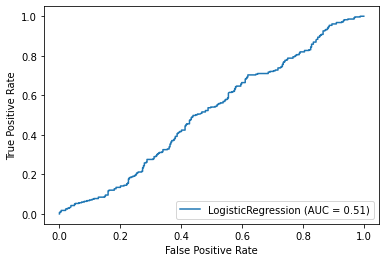

In [173]:
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(Final_model2,x_test,y_test)

This curve helps us to choose the best model amongst the models for which we have plotted ROC curve.The best model is one which cover the maximum area under it.our support vector classifier ROC curve cover 51% area under it.¶

In [174]:
import joblib
joblib.dump(Final_model2,"Red Wine Quality.pkl")

['Red Wine Quality.pkl']

Here we saved our model Sucessfully